# Clustering

Clustering is an unsupervised machine learning algorithm. As you surely know by now, machine learning automates analytical model building using AI. It necessarily assumes that machines will identify patterns to learn from data.

There are two broad categories of machine learning:

* Supervised Machine Learning: algorithms are ‘trained’ using labeled data.
* Unsupervised Machine Learning: algorithms used on unlabeled data

Supervised machine learning should be familiar by now. This is what we were doing with out classification algorithms - taking labeled  data and feeding it to our machine to recognize patterns. Supervised machine learning is what a police K-9 office is doing when it is given a scent and released on a hunt. Supervised machine learning algorithms are 'trained' using labeled examples then tested against new examples. 


Unsupervised machine learning is void of any labels. It is pure pattern recognition. Unsupervised ML is not used as frequently, but there are nonetheless some very obvious economic applications. With unsupervised machine learning there is no 'right answer', no accuracy score. There are results, but we have no way to judge them as 'good' or 'bad', they just are what they are.

In the case of clustering algorithms, what they are is a list of instructions that will ultimately group a set of objects such that objects in the same group are more similar than to those in other groups. The algorithm organizes unlabeled data into similarity groups called clusters when each cluster is a collection of data items that share some similarity and are somewhat dissimilar to items in other clusters. In doing so it generally finds boundaries in the data the naked eye cannot delineate. The goal is to capture the natural structure of the data in an objective way.



### Back to the Iris Data 

Remember the three classes in the Iris dataset are:

* Iris-setosa (n=50)
* Iris-versicolor (n=50)
* Iris-virginica (n=50)

And the four features of in Iris dataset are:

* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [2]:
X = df.drop(['class'], axis=1)
X = X.values
y = df['class']
y = y.values


In the context of clustering algorithms, distortion, also known as inertia or within-cluster sum of squares, is a measure of how spread out the clusters are. It is used to evaluate the performance of a clustering algorithm.

Distortion is often calculated as the sum of the squared distances between each data point in a cluster and the centroid of that cluster. The idea is to measure how close the data points within a cluster are to the centroid of that cluster. 


c:\Users\carso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


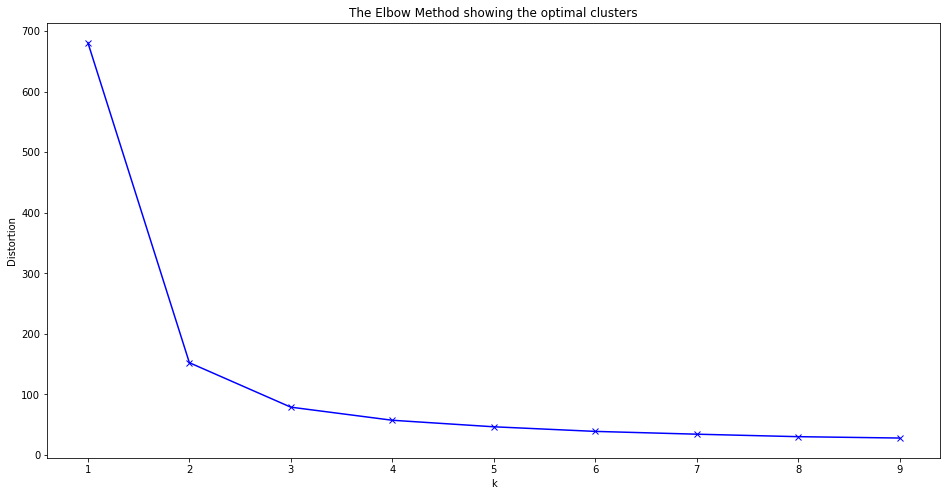

In [3]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal clusters')
plt.show()

In [4]:
# Define the model
kmeans_model = KMeans(n_clusters=3, random_state=32932)
# Fit into our dataset fit
kmeans_predict = kmeans_model.fit_predict(X)

In [5]:
kmeans_model.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [6]:
df['Cluster'] = kmeans_predict
df

,sepal_len,sepal_wid,petal_len,petal_wid,class,Cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,1
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [7]:
df.groupby(['class'])['Cluster'].value_counts()


class            Cluster
Iris-setosa      0          50
Iris-versicolor  1          48
                 2           2
Iris-virginica   2          36
                 1          14
Name: Cluster, dtype: int64

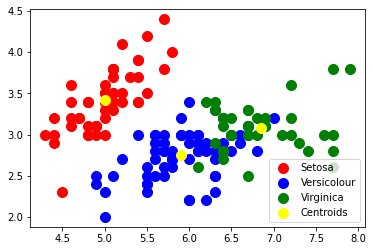

In [8]:
#Visualising the clusters
plt.scatter(X[kmeans_predict == 0, 0], X[kmeans_predict == 0, 1], s = 100, c = 'red', label = 'Setosa')
plt.scatter(X[kmeans_predict == 1, 0], X[kmeans_predict == 1, 1], s = 100, c = 'blue', label = 'Versicolour')
plt.scatter(X[kmeans_predict == 2, 0], X[kmeans_predict == 2, 1], s = 100, c = 'green', label = 'Virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

# Practice with Customer Data

Market segmentation is the practice of dividing an aggregated target market into smaller, more homogeneous groups. This can be undertaken for many purposes, but it is typically used in marketing strategies. Clustering is a great approach to market segmentation since it will find similar groups without any supervision.

In this example, you will demonstrate the ways in which clustering can be used to find customer groups within a fictional airline's frequent flyer program. As a motivating example, suppose the airline is trying to target different customer segments with type-specific reward offers.

The file SkyKilometers.csv contains information on 3,999 members of the frequent flyer program. This data comes from the textbook "Data Mining for Business Intelligence," by Galit Shmueli, Nitin R. Patel, and Peter C. Bruce. For more information, see [website for the book](http://www.dataminingbook.com/).

The data contains values for seven different features in the dataset:

* `Balance` = number of miles eligible for award travel
* `QualMiles` = number of miles qualifying for TopFlight status
* `BonusMiles` = number of miles earned from non-flight bonus transactions in the past 12 months
* `BonusTrans` = number of non-flight bonus transactions in the past 12 months
* `FlightMiles` = number of flight miles in the past 12 months
* `FlightTrans` = number of flight transactions in the past 12 months
* `DaysSinceEnroll` = number of days since enrolled in the frequent flyer program

In [10]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram


data = pd.read_csv('../data/SkyKilometers.csv', sep=',')
data.head()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,97752,0,43300,26,2077,4,6935


It may be helpful to investigate the distribution of each variable visually before you begin clustering. Use the code below to generate histrograms of the values for each feature in the dataset.

c:\Users\carso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


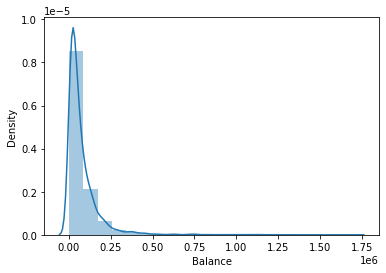

c:\Users\carso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


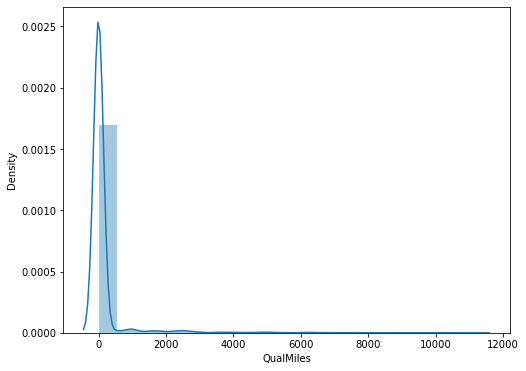

c:\Users\carso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


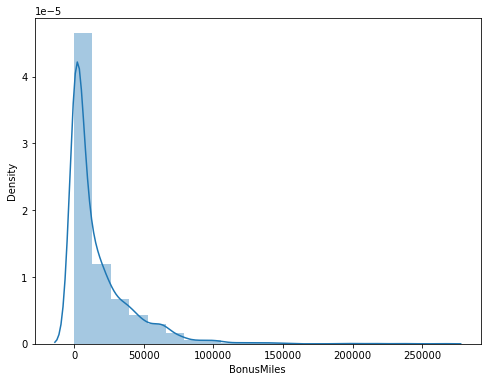

c:\Users\carso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


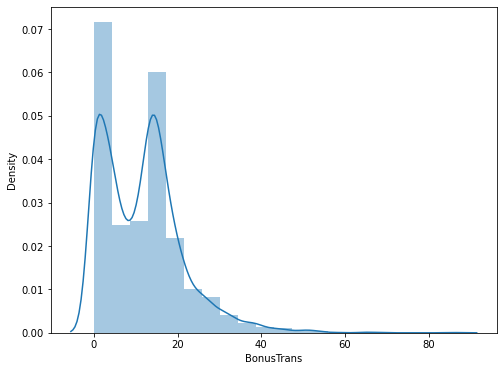

c:\Users\carso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


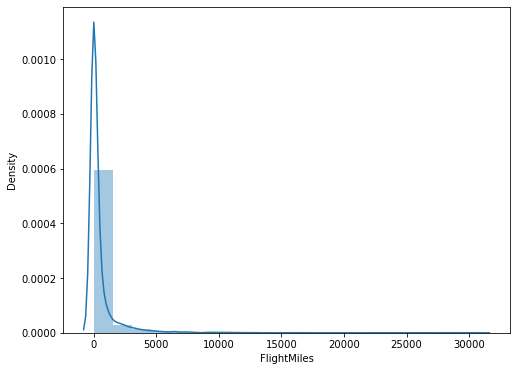

c:\Users\carso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


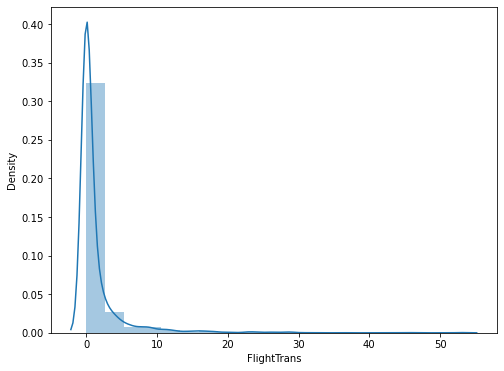

c:\Users\carso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


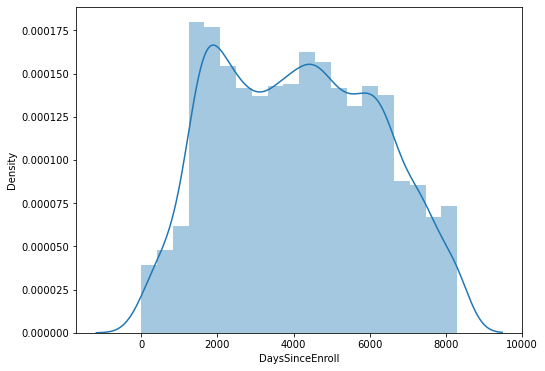

<Figure size 576x432 with 0 Axes>

In [11]:
features = data.keys()
for i in range(0, 7):
    sns.distplot(data[features[i]], bins=20)
    plt.show()
    plt.figure(figsize=(8, 6)) 

1. Start by summarizing each feature of the dataset. Which variables appear to have the smallest average values? Which have that largest average values? Which variables have the smallest range? Which variables have the greatest variability? What problems might you encounter by running the clustering algorithm on this data? In the next step you will be asked to normalize the data - why is this a pivotal step to complete prior to clustering?

In [12]:
data.describe()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
count,3.999000e+03,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,144.114529,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,773.663804,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,0.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,0.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,0.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,11148.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


2. Normalize each variable using the formula $ z = \frac{x - \mu}{\sigma} $. Once complete, verify success by confirming that the mean for each variable is zero and the standard deviation is 1.

In [13]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(data[['Balance','QualMiles','BonusMiles','BonusTrans','FlightMiles','FlightTrans','DaysSinceEnroll']])
data_std = std_scale.transform(data[['Balance','QualMiles','BonusMiles','BonusTrans','FlightMiles','FlightTrans','DaysSinceEnroll']])

In [14]:
print('Mean after standardization:\nBalance={:.2f}, QualMiles={:.2f}, BonusMiles={:.2f}, BonusTrans={:.2f}, FlightMiles={:.2f}, FlightTrans={:.2f}, DaysSinceEnroll={:.2f}'
      .format(data_std[:,0].mean(), data_std[:,1].mean(), data_std[:,2].mean(), data_std[:,3].mean(), data_std[:,4].mean(), data_std[:,5].mean(), data_std[:,6].mean()))
print('\nStandard deviation after standardization:\nBalance={:.2f}, QualMiles={:.2f}, BonusMiles={:.2f}, BonusTrans={:.2f}, FlightMiles={:.2f}, FlightTrans={:.2f}, DaysSinceEnroll={:.2f}'
      .format(data_std[:,0].std(), data_std[:,1].std(), data_std[:,2].std(), data_std[:,3].std(), data_std[:,4].std(), data_std[:,5].std(), data_std[:,6].std()))

Mean after standardization:
Balance=0.00, QualMiles=0.00, BonusMiles=-0.00, BonusTrans=-0.00, FlightMiles=0.00, FlightTrans=0.00, DaysSinceEnroll=0.00

Standard deviation after standardization:
Balance=1.00, QualMiles=1.00, BonusMiles=1.00, BonusTrans=1.00, FlightMiles=1.00, FlightTrans=1.00, DaysSinceEnroll=1.00


3. Compute the distances between data points using the euclidean norm and then run the Hierarchical clustering algorithm (using method="ward") on the normalized data. It may take awhile for the commands to finish since the dataset has a large number of observations for hierarchical clustering. Be patient and ask your neighbor how their day is going. 

In [15]:
from scipy.spatial.distance import pdist, squareform

data_dist = pdist(data_std)
dist_matrix = linkage(data_dist,'ward', metric='euclidean')

<function matplotlib.pyplot.show(close=None, block=None)>

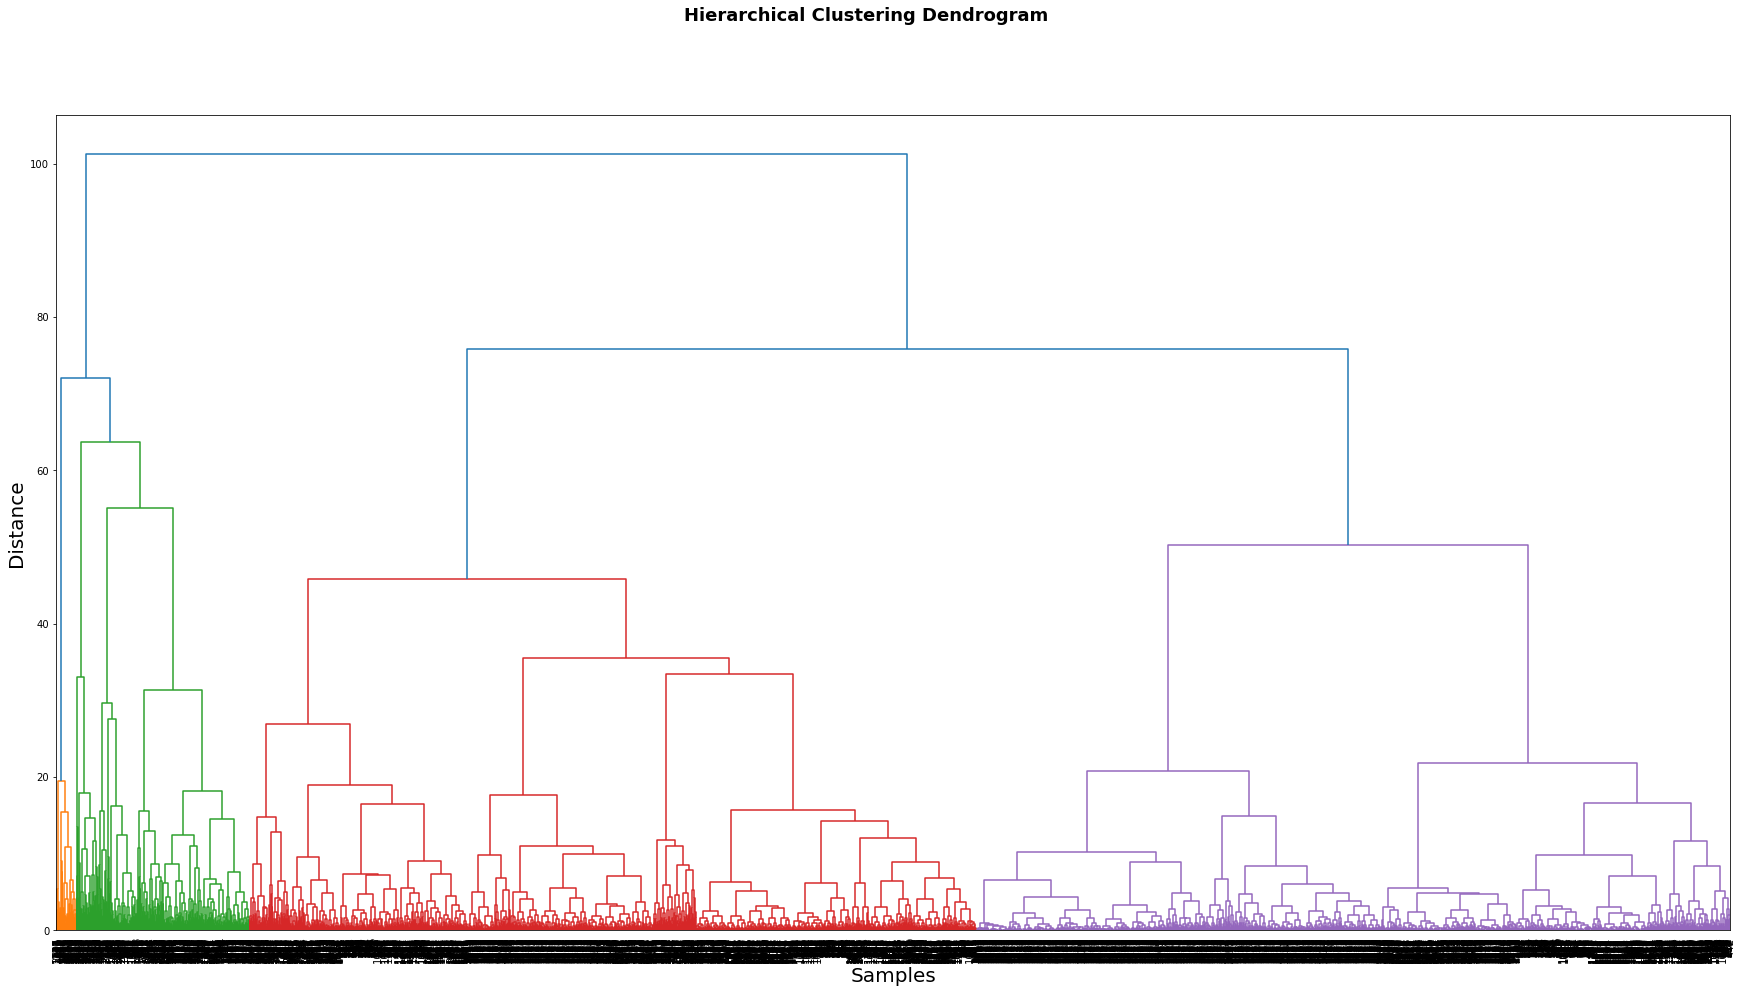

In [16]:
plt.figure(figsize=(30, 15))
dendrogram(dist_matrix, leaf_rotation=90.,leaf_font_size=10.)#,labels=df.dtype.names)
plt.xlabel('Samples', fontsize=20)
plt.ylabel('Distance', fontsize=20)
plt.suptitle('Hierarchical Clustering Dendrogram', fontweight='bold', fontsize=18);
plt.show

4. Once you have your dendogram, identify at least two numbers of clusters that do not make sense given your output. 

5. Suppose that after looking at the dendrogram the airline CEO decides they see 5 distinct groups. Divide the data points into 5 clusters by using the agglomerative clustering algorithm. How many customers appear in each cluster? Use the code below to generate the clusters, then fill in the next codeblock to count the number of customers assigned to each cluster.

In [17]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
data['cluster'] = cluster.fit_predict(data_std)

In [18]:
data['cluster'].value_counts()

1    1801
2    1737
0     360
4      53
3      48
Name: cluster, dtype: int64

6. Use the cluster label and the other dataframe information to describe each of the clusters. In which ways are the customers similar? What seems to differentiate each cluster? Create some codeblocks to run some 'back-of-the-envelope' calculations.

In [37]:
data[data["cluster"]==0].describe()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll,cluster
count,3.600000e+02,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.0
mean,2.043162e+05,144.711111,36265.022222,19.802778,2286.719444,6.744444,4744.158333,0.0
std,2.353253e+05,518.744048,42553.918798,10.873417,1584.947292,4.647007,2136.319184,0.0
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,429.000000,0.0
25%,4.912200e+04,0.000000,6871.500000,12.000000,1140.000000,3.000000,2868.500000,0.0
50%,1.085435e+05,0.000000,22754.500000,18.000000,2135.500000,6.000000,4834.500000,0.0
75%,3.132022e+05,0.000000,49324.250000,26.000000,3193.750000,9.000000,6447.750000,0.0
max,1.704838e+06,4704.000000,263685.000000,65.000000,7450.000000,23.000000,8296.000000,0.0


7. Now try to run the k-means clustering algorithm on the normalized data, once more creating 5 clusters. 

In [38]:
from sklearn import metrics
from sklearn.cluster import KMeans

kmeans = KMeans(init='k-means++', n_clusters=5, n_init=20) 
y_km = kmeans.fit(data_std)
y_pred = kmeans.fit_predict(data_std)

In [39]:
pd.DataFrame(y_pred).value_counts()

0    1649
3    1372
1     778
4     143
2      57
dtype: int64

In [40]:
clusters_labels = y_pred # data labeled regarding clusters
clusters_centroid = kmeans.cluster_centers_ # clusters centers or centroids
clusters_inertia = kmeans.inertia_  #Sum of squared distances of samples to their closest cluster center

array([[<AxesSubplot:title={'center':'Data samples in each cluster'}>]],
      dtype=object)

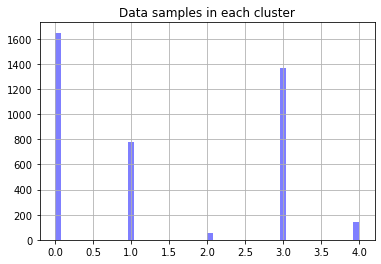

In [41]:
df2=pd.DataFrame(data=clusters_labels,columns=['Data samples in each cluster']) 
df2.hist(color='b', alpha=0.5, bins=50)

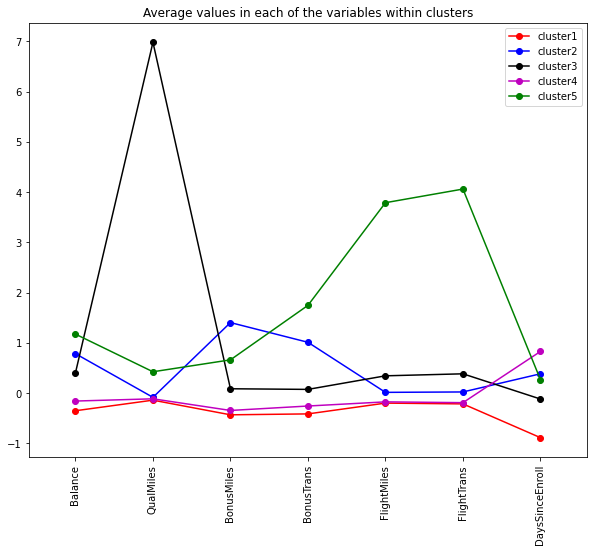

In [44]:
labels=data.columns.values
N=8
ind = np.arange(N)
plt.figure(figsize=(10, 8))
plt.plot((data_std[clusters_labels==0]).mean(axis=0),'-ro',label='cluster1')
plt.plot((data_std[clusters_labels==1]).mean(axis=0),'-bo',label='cluster2')
plt.plot((data_std[clusters_labels==2]).mean(axis=0),'-ko',label='cluster3')
plt.plot((data_std[clusters_labels==3]).mean(axis=0),'-mo',label='cluster4')
plt.plot((data_std[clusters_labels==4]).mean(axis=0),'-go',label='cluster5')
plt.xticks(ind,labels, rotation='vertical')
plt.margins(x=0.1)
plt.title('Average values in each of the variables within clusters')
plt.legend()
plt.show()

8. Using the information above, describe each of the clusters. In which ways are the customers similar? What differentiates each cluster?